In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [109]:
df = pd.read_csv('output_w_coop.csv')

In [110]:
df.head()

,registrationid,churned,score,energy_efficiency,water_efficiency,number_of_311_complains_past_year,number_of_311_complains_2_years_prior,number_of_ecb_violations_last_year,number_of_ecb_violations_2_years_prior,hmcv_violations_past_year_class_a,...,percent_indiv_portfolio,percent_condominium_portfolio,percent_joint_portfolio,percent_lp_portfolio,percent_hdfc_portfolio,percent_registered,average_energy,average_water,management_ranking,corporationname
0,10309,0,402.64,263.65,134.99,1,2,0,0,0,...,0.29,NaN,NaN,NaN,NaN,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
1,10310,0,398.64,263.65,134.99,0,0,0,0,0,...,0.29,NaN,NaN,NaN,NaN,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
2,10311,0,398.64,263.65,134.99,0,0,0,0,0,...,0.29,NaN,NaN,NaN,NaN,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
3,10312,0,398.64,263.65,134.99,0,0,0,0,0,...,0.29,NaN,NaN,NaN,NaN,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
4,10313,0,403.64,263.65,134.99,1,3,0,0,0,...,0.29,NaN,NaN,NaN,NaN,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT


In [111]:
df.shape

(10417, 58)

In [112]:
pd.DataFrame(df.columns)

,0
0,registrationid
1,churned
2,score
3,energy_efficiency
4,water_efficiency
5,number_of_311_complains_past_year
6,number_of_311_complains_2_years_prior
7,number_of_ecb_violations_last_year
8,number_of_ecb_violations_2_years_prior
9,hmcv_violations_past_year_class_a


In [113]:
df = df.drop(['registrationid', 'buildingid', 'housenumber', 'streetname', 'boro', 'zip', 'recordstatus',
             'contactdescription', 'firstname', 'lastname', ], 
             axis=1)

In [114]:
df.iloc[0, :]

churned                                                           0
score                                                        402.64
energy_efficiency                                            263.65
water_efficiency                                             134.99
number_of_311_complains_past_year                                 1
number_of_311_complains_2_years_prior                             2
number_of_ecb_violations_last_year                                0
number_of_ecb_violations_2_years_prior                            0
hmcv_violations_past_year_class_a                                 0
hmcv_violations_past_year_class_b                                 0
hmcv_violations_past_year_class_c                                 0
hmcv_violations_2_years_prior_class_a                             0
hmcv_violations_2_years_prior_class_b                             0
hmcv_violations_2_years_prior_class_c                             0
total_resolve_time                              

In [115]:
p_i_start, p_i_end = df.columns.get_loc('percent_condo_portfolio'), df.columns.get_loc('percent_hdfc_portfolio')
df.iloc[:, p_i_start:p_i_end + 1] = df.iloc[:, p_i_start:p_i_end + 1].fillna(0, axis=1)
df.iloc[0:5, p_i_start:p_i_end + 1]

,percent_condo_portfolio,percent_coop_portfolio,percent_genpart_portfolio,percent_llc_portfolio,percent_corp_portfolio,percent_indiv_portfolio,percent_condominium_portfolio,percent_joint_portfolio,percent_lp_portfolio,percent_hdfc_portfolio
0,0.71,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0
1,0.71,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0
2,0.71,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0
3,0.71,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0
4,0.71,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0,0.0


In [116]:
null = pd.DataFrame(df.isnull().sum()).rename(columns={0: 'Null'})
null[null.Null > 0]

,Null
total_resolve_time,778
hearing_outcomes,1004
dobbuildingclassid,1
legalclassa,1
legalclassb,624
units,53
avg_resolve_time,41
hearing_outcomes.1,43
class_a_per_unit,53
class_b_per_unit,53


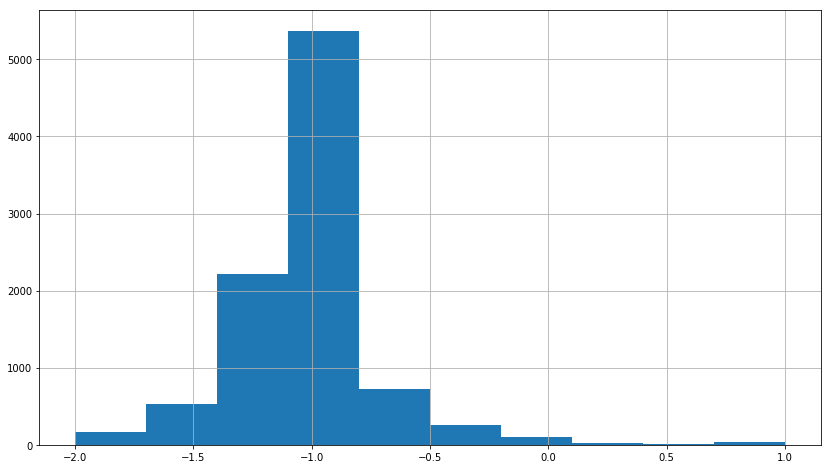

In [117]:
plt.figure(figsize=(14, 8))
df.hearing_outcomes.hist()

In [118]:
hear_m = df.hearing_outcomes.median()
hea1_m = df['hearing_outcomes.1'].median()
total_resolve_time_median = df.total_resolve_time.median()
df.hearing_outcomes = df.hearing_outcomes.fillna(hear_m)
df.total_resolve_time = df.total_resolve_time.fillna(total_resolve_time_median)
df = df.fillna({'hearing_outcomes': hear_m, 'hearing_outcomes.1': hea1_m, 'total_resolve_time': total_resolve_time_median})
print(hear_m, hea1_m, total_resolve_time_median)

-1.0 -1.0344529328128542 961.0


In [119]:
df[df.churned == 1][['legalclassa', 'legalclassb']].nunique()

legalclassa    33
legalclassb     1
dtype: int64

In [120]:
medians = df[['legalclassa', 'legalclassb']].median()
df = df.fillna({'legalclassa': medians[0], 'legalclassb': medians[1]})
medians

legalclassa    15.0
legalclassb     0.0
dtype: float64

In [121]:
df = df.fillna(df[null[null.Null > 0].index].median())

In [122]:
df.dtypes[(df.dtypes != 'int64') & (df.dtypes != 'float64')]

registered         object
corporationname    object
dtype: object

In [123]:
df.registered = df.registered.apply(lambda s: 1 if s == 'YES' else 0)

55


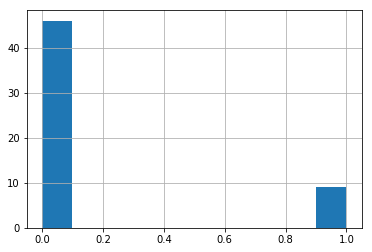

In [124]:
print((df.churned == 1).sum())
df[df.churned == 1].registered.hist()

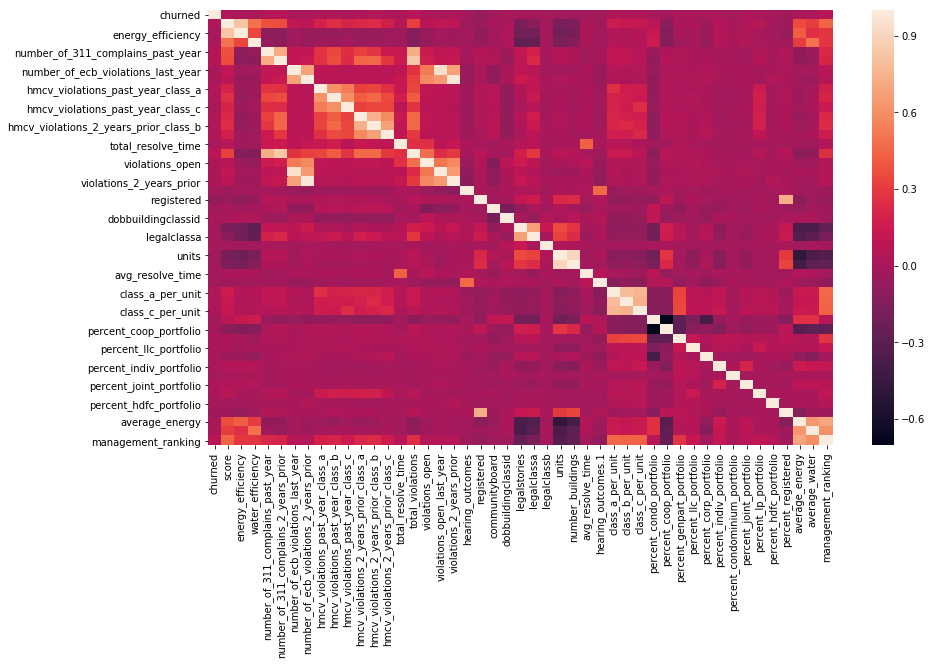

In [125]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr())

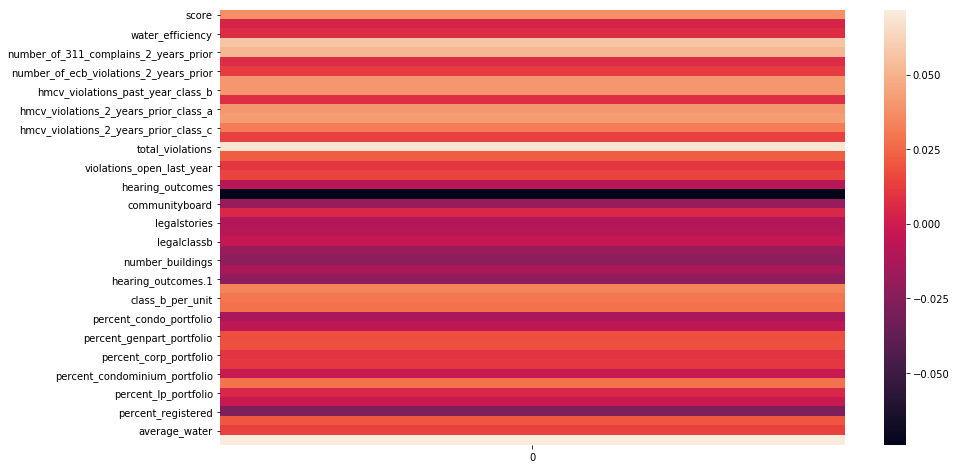

In [126]:
plt.figure(figsize=(14, 8))
sns.heatmap(pd.DataFrame(df.iloc[:, 1:].corrwith(df.churned)))

In [127]:
df[df.churned == 1].corporationname.nunique()

39

In [128]:
df = df.drop('corporationname', axis=1)

In [129]:
X = df.iloc[:, 1:]
y = pd.DataFrame(df.iloc[:, 0])

In [130]:
y['weight'] = y.churned.apply(lambda x: 500 if x else 0.1)

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
(y_test == 1).sum()

churned    8
weight     0
dtype: int64

In [134]:
y_test[y_test.churned == 1].head()

,churned,weight
3555,1,500.0
8341,1,500.0
185,1,500.0
4254,1,500.0
5020,1,500.0


# XGBoost

In [135]:
import xgboost as xgb

In [136]:
model = xgb.XGBClassifier(n_jobs=-1)

In [137]:
model.fit(X_train, y_train.churned,
          sample_weight=y_train.weight,
          eval_set=[(X_train, y_train.churned), (X_test, y_test.churned)],
          sample_weight_eval_set=[y_train.weight, y_test.weight])

[0]	validation_0-error:0.011312	validation_1-error:0.254944
[1]	validation_0-error:0.01201	validation_1-error:0.255776
[2]	validation_0-error:0.011312	validation_1-error:0.254944
[3]	validation_0-error:0.01185	validation_1-error:0.255515
[4]	validation_0-error:0.011312	validation_1-error:0.254944
[5]	validation_0-error:0.010662	validation_1-error:0.254112
[6]	validation_0-error:0.011838	validation_1-error:0.255491
[7]	validation_0-error:0.011562	validation_1-error:0.255277
[8]	validation_0-error:0.011747	validation_1-error:0.255538
[9]	validation_0-error:0.011649	validation_1-error:0.255419
[10]	validation_0-error:0.011534	validation_1-error:0.255277
[11]	validation_0-error:0.011645	validation_1-error:0.255419
[12]	validation_0-error:0.011534	validation_1-error:0.255206
[13]	validation_0-error:0.011513	validation_1-error:0.25511
[14]	validation_0-error:0.011743	validation_1-error:0.255396
[15]	validation_0-error:0.011464	validation_1-error:0.254992
[16]	validation_0-error:0.011612	vali

C:\Users\PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PC\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18]	validation_0-error:0.011456	validation_1-error:0.254968
[19]	validation_0-error:0.011398	validation_1-error:0.254897
[20]	validation_0-error:0.011003	validation_1-error:0.25435
[21]	validation_0-error:0.011127	validation_1-error:0.254445
[22]	validation_0-error:0.011345	validation_1-error:0.254897
[23]	validation_0-error:0.011221	validation_1-error:0.254683
[24]	validation_0-error:0.011065	validation_1-error:0.254398
[25]	validation_0-error:0.010806	validation_1-error:0.254136
[26]	validation_0-error:0.010765	validation_1-error:0.253851
[27]	validation_0-error:0.010531	validation_1-error:0.253376
[28]	validation_0-error:0.010399	validation_1-error:0.253233
[29]	validation_0-error:0.009885	validation_1-error:0.252496
[30]	validation_0-error:0.00998	validation_1-error:0.252544
[31]	validation_0-error:0.009585	validation_1-error:0.251783
[32]	validation_0-error:0.009655	validation_1-error:0.251807
[33]	validation_0-error:0.009565	validation_1-error:0.251759
[34]	validation_0-error:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [138]:
y_pred = model.predict(X_test)
(y_pred == y_test.churned).sum() / y_test.churned.count()

0.9064299424184261

In [139]:
pd.DataFrame(confusion_matrix(y_test.churned, y_pred))

,0,1
0,1884,192
1,3,5


In [140]:
y_pred = model.predict(X_train)
(y_pred == y_train.churned).sum() / y_train.churned.count()

0.9123964958598344

In [141]:
pd.DataFrame(confusion_matrix(y_train.churned, y_pred))

,0,1
0,7556,730
1,0,47


In [142]:
importance = pd.DataFrame({'Features':list(X_train), 'importance':np.round(model.feature_importances_, 3)})
del_feat = importance[importance.importance == 0]
del_feat

,Features,importance
1,energy_efficiency,0.0
5,number_of_ecb_violations_last_year,0.0
8,hmcv_violations_past_year_class_b,0.0
9,hmcv_violations_past_year_class_c,0.0
11,hmcv_violations_2_years_prior_class_b,0.0
17,violations_2_years_prior,0.0
24,legalclassb,0.0
34,percent_genpart_portfolio,0.0
38,percent_condominium_portfolio,0.0
41,percent_hdfc_portfolio,0.0


In [93]:
del_feat.Features.values

array(['energy_efficiency', 'number_of_ecb_violations_last_year',
       'hmcv_violations_past_year_class_b',
       'hmcv_violations_past_year_class_c',
       'hmcv_violations_2_years_prior_class_b',
       'violations_2_years_prior', 'legalclassb',
       'percent_genpart_portfolio', 'percent_condominium_portfolio',
       'percent_hdfc_portfolio'], dtype=object)

In [144]:
X_train = X_train.drop(del_feat.Features, axis=1)
X_test = X_test.drop(del_feat.Features, axis=1)

In [145]:
model2 = xgb.XGBClassifier(n_jobs=-1, max_depth=2)

In [146]:
model2.fit(X_train, y_train.churned,
          sample_weight=y_train.weight,
          eval_set=[(X_train, y_train.churned), (X_test, y_test.churned)],
          sample_weight_eval_set=[y_train.weight, y_test.weight])

[0]	validation_0-error:0.015702	validation_1-error:0.142006
[1]	validation_0-error:0.01206	validation_1-error:0.255776
[2]	validation_0-error:0.015714	validation_1-error:0.261076
[3]	validation_0-error:0.01206	validation_1-error:0.255776
[4]	validation_0-error:0.014731	validation_1-error:0.140413
[5]	validation_0-error:0.014686	validation_1-error:0.140294
[6]	validation_0-error:0.017107	validation_1-error:0.143907
[7]	validation_0-error:0.017021	validation_1-error:0.143883
[8]	validation_0-error:0.015278	validation_1-error:0.141483
[9]	validation_0-error:0.017711	validation_1-error:0.14519
[10]	validation_0-error:0.017362	validation_1-error:0.144905
[11]	validation_0-error:0.019183	validation_1-error:0.147353
[12]	validation_0-error:0.015344	validation_1-error:0.141602
[13]	validation_0-error:0.015299	validation_1-error:0.141554
[14]	validation_0-error:0.017136	validation_1-error:0.144406
[15]	validation_0-error:0.015138	validation_1-error:0.141198
[16]	validation_0-error:0.01504	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [147]:
model2.feature_importances_

array([0.05674676, 0.02844653, 0.01481817, 0.02199366, 0.01494103,
       0.04299866, 0.        , 0.00648449, 0.02386785, 0.04040132,
       0.01593559, 0.00911931, 0.08434222, 0.03760633, 0.02346067,
       0.01036213, 0.02231809, 0.03834479, 0.01912793, 0.03884446,
       0.02304309, 0.06532095, 0.01425525, 0.01458012, 0.01796766,
       0.02152568, 0.02637437, 0.02244852, 0.00823096, 0.        ,
       0.        , 0.        , 0.02194499, 0.06392943, 0.00062302,
       0.14959595], dtype=float32)

In [148]:
y_pred = model2.predict(X_test)
(y_pred == y_test.churned).sum() / y_test.churned.count()

0.7696737044145874

In [149]:
pd.DataFrame(confusion_matrix(y_test.churned, y_pred))

,0,1
0,1598,478
1,2,6


In [151]:
xgb_clfs = [model, model2]

In [152]:
model.save_model('xgb_classifier1.cfg')
model2.save_model('xgb_classifier2.cfg')

In [153]:
import pickle

In [154]:
for indx, item in enumerate(xgb_clfs):
    pickle.dump(item, open('xgb{}.pickle'.format(indx + 1), 'wb'))

In [155]:
temp = pickle.load(open('xgb1.pickle', 'rb'))

In [156]:
temp2 = pickle.load(open('xgb2.pickle', 'rb'))

In [157]:
temp2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# RandomForest

In [900]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [901]:
model_forest = RandomForestClassifier()

In [902]:
params = {
    'n_estimators': range(10, 151, 10),
    'criterion': ['entropy'],
    'max_depth': range(2, 5),
    'class_weight': [{0:1, 1:1000}],
}

In [903]:
clf = GridSearchCV(model_forest, params, cv=5, n_jobs=-1)

In [904]:
clf.fit(X_train, y_train.churned)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 151, 10), 'criterion': ['entropy'], 'max_depth': range(2, 5), 'class_weight': [{0: 1, 1: 1000}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [905]:
random_forest_clf = clf.best_estimator_

In [906]:
clf.best_params_

{'class_weight': {0: 1, 1: 1000},
 'criterion': 'entropy',
 'max_depth': 4,
 'n_estimators': 100}

In [907]:
clf.best_score_

0.8041521660866434

In [908]:
y_pred = random_forest_clf.predict(X_test)
(y_pred == y_test.churned).sum() / y_test.churned.count()

0.7763915547024952

In [909]:
pd.DataFrame(confusion_matrix(y_test.churned, y_pred))

,0,1
0,1613,463
1,3,5


# LogisticRegression

In [910]:
from sklearn.linear_model import LogisticRegression

In [911]:
clf = LogisticRegression()

In [912]:
params = {
    'class_weight': [{0:1, 1:250}]
}

In [913]:
grid_clf = GridSearchCV(clf, params, cv=5, n_jobs=-1)

In [914]:
grid_clf.fit(X_train, y_train.churned)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'class_weight': [{0: 1, 1: 250}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [915]:
logistic_clf = grid_clf.best_estimator_

In [916]:
y_pred = grid_clf.predict(X_test)
(y_pred == y_test.churned).sum() / y_test.churned.count()

0.6871401151631478

In [917]:
pd.DataFrame(confusion_matrix(y_test.churned, y_pred))

,0,1
0,1427,649
1,3,5


# Neurol Network

In [918]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [756]:
y_train['weight'] = y_train.churned.apply(lambda x: 100 if x else 1)
y_test['weight'] = y_test.churned.apply(lambda x: 100 if x else 1)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [919]:
y_test.churned.unique()

array([0, 1], dtype=int64)

In [920]:
num_featchs = X_train.shape[1]
num_featchs

36

In [921]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=num_featchs))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [922]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [923]:
model.fit(X_train, y_train.churned.values, epochs=10,
          validation_data=(X_test, y_test.churned.values, y_test.weight.values),
          batch_size=32,
          sample_weight=y_train.weight.values)

Train on 8333 samples, validate on 2084 samples
Epoch 1/10
8333/8333 [==============================] - 5s 552us/step - loss: 32.3470 - binary_accuracy: 0.8698 - val_loss: 16.3048 - val_binary_accuracy: 0.8373
Epoch 2/10
8333/8333 [==============================] - 2s 190us/step - loss: 25.8191 - binary_accuracy: 0.8147 - val_loss: 16.1417 - val_binary_accuracy: 0.7644
Epoch 3/10
8333/8333 [==============================] - 1s 179us/step - loss: 24.1395 - binary_accuracy: 0.7211 - val_loss: 16.0723 - val_binary_accuracy: 0.6939
Epoch 4/10
8333/8333 [==============================] - 2s 187us/step - loss: 24.0661 - binary_accuracy: 0.6939 - val_loss: 16.0480 - val_binary_accuracy: 0.6761
Epoch 5/10
8333/8333 [==============================] - 1s 179us/step - loss: 24.0157 - binary_accuracy: 0.6888 - val_loss: 16.0241 - val_binary_accuracy: 0.6727
Epoch 6/10
8333/8333 [==============================] - 2s 183us/step - loss: 23.9788 - binary_accuracy: 0.6876 - val_loss: 15.9995 - val_bina

In [924]:
y_pred = model.predict(X_test)

In [930]:
y_pred[y_pred > 0] = 1

In [931]:
y_pred = np.array(y_pred.reshape(y_pred.shape[0]), dtype=np.int32)

In [932]:
(y_pred == y_test.churned).sum() / y_test.churned.count()

0.9870441458733206

In [933]:
pd.DataFrame(confusion_matrix(y_test.churned.values, y_pred))

,0,1
0,2057,19
1,8,0


# Conclusion

## The best model is XGBoost Classifier

In [47]:
xgb_clfs

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
        n_estimators=100, n_jobs=-1, nthread=None,
        objective='binary:logistic', random_state=0, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
        subsample=1, verbosity=1),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
        max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
        n_estimators=100, n_jobs=-1, nthread=None,
        objective='binary:logistic', random_state=0, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
        subsample=1, verbosity=1)]